In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

'C:\\Users\\mandapmr\\Desktop\\Python-Learning-Creating-Algorithms-from-scratch'

In [2]:
#changing working directory to point to file location
os.chdir('C:\\Users\\mandapm\\Documents\\CS Class\\assgn2')

In [3]:
# MNIST training images are downloaded and loaded as training_images 
training_images_file = open('train-images-idx3-ubyte','rb')
training_images = training_images_file.read()
training_images_file.close()

In [4]:
# MNIST training labels are downloaded and loaded as training_labels
training_labels_file = open('train-labels-idx1-ubyte','rb')
training_labels = training_labels_file.read()
training_labels_file.close()

In [5]:
# MNIST test images are downloaded and loaded as test_images 
test_images_file = open('t10k-images-idx3-ubyte','rb')
test_images = test_images_file.read()
test_images_file.close()

In [6]:
# MNIST test labels are downloaded and loaded as test_labels 
test_labels_file = open('t10k-labels-idx1-ubyte','rb')
test_labels = test_labels_file.read()
test_labels_file.close()

In [7]:
#byte array function is used to convert to mutable array of bytes
training_images = bytearray(training_images)
training_labels = bytearray(training_labels)
test_images = bytearray(test_images)
test_labels = bytearray(test_labels)

In [8]:
# Removing the descriptor values and shaping training images to 60000*784 array
training_images = training_images[16:]
training_images = np.array(training_images)
train_X = training_images.reshape(60000,784)

In [9]:
# Removing the descriptor values and shaping training labels to 60000*1 array
training_labels = training_labels[8:]
training_labels = np.array(training_labels)
train_Y = training_labels.reshape(60000,1)    

In [10]:
# Removing the descriptor values and shaping test images to 10000*784 array
test_images = test_images[16:]
test_images = np.array(test_images)
test_X = test_images.reshape(10000,784)

In [11]:
# Removing the descriptor values and shaping test labels to 10000*1 array
test_labels = test_labels[8:]
test_labels = np.array(test_labels)
test_Y = test_labels.reshape(10000,1)

In [12]:
# Seperating the training data based on labels
train_XY = np.concatenate((train_X,train_Y),axis=1)
train_XY0 = train_XY[train_XY[:,784]==0]
train_XY1 = train_XY[train_XY[:,784]==1]
train_XY2 = train_XY[train_XY[:,784]==2]
train_XY3 = train_XY[train_XY[:,784]==3]
train_XY4 = train_XY[train_XY[:,784]==4]
train_XY5 = train_XY[train_XY[:,784]==5]
train_XY6 = train_XY[train_XY[:,784]==6]
train_XY7 = train_XY[train_XY[:,784]==7]
train_XY8 = train_XY[train_XY[:,784]==8]
train_XY9 = train_XY[train_XY[:,784]==9]

In [13]:
#creating a naive bayes classifier
def problem1():
    train_bx = np.zeros(train_X.shape)
    train_bx[train_X > 0] = 1
    train_bdata = np.concatenate((train_bx,train_Y),axis=1)
    count = np.zeros((10))
    sum_x,Thetakd = np.zeros((10,784)),np.zeros((10,784))
    for k in range(10):
        count[k] = np.sum([train_Y == k])
        sum_x[k] = np.sum(train_bx[train_bdata[:,784]==k],axis = 0)
        Thetakd[k] = (count[k]+1)/(sum_x[k]+10)
    test_X[test_X > 0] = 1
    Prob_Y10 = np.dot(test_X,1-(Thetakd.T))
    Pred_Y_index = np.array(np.argmax(Prob_Y10, axis=1))
    correct =0
    for i in range(10000):
        if Pred_Y_index[i]==test_Y[i]:
            correct = correct+1
    print('Naive Bayes accuracy (with Dirichlet prior) is',correct/10000)
    
problem1()

Niave Bayes accuracy (with Dirichlet prior) is 0.6691


In [14]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr,color='orange')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

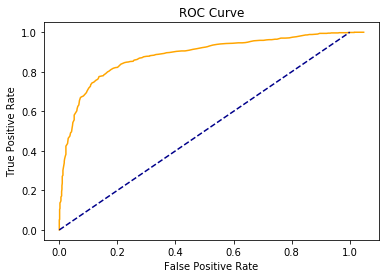

In [15]:
# Naive Bayes Gaussian
def problem2():
    ind5 = np.random.randint(low=0, high=5421, size=1000)
    ind = np.random.randint(low=0, high=5400, size=111)
    dataset_2= np.concatenate((train_XY5[ind5,:],train_XY0[ind,:],train_XY1[ind,:],train_XY2[ind,:],train_XY3[ind,:],train_XY4[ind,:],train_XY6[ind,:],train_XY7[ind,:],train_XY8[ind,:],train_XY9[ind,:]),axis =0)
    dataset_2[0:1000,784] = 1
    dataset_2[1000:,784] = 0
    mask = np.random.rand(1999)<0.1
    train_P2 = dataset_2[mask]
    mask_test = np.logical_not(mask)
    test_P2 = dataset_2[mask_test]
    Mean_class1 = np.mean(train_P2[train_P2[:,784]==1],axis = 0)
    Mean_class0 = np.mean(train_P2[train_P2[:,784]==0],axis = 0)
    Var_class1 = np.var(train_P2[train_P2[:,784]==1])
    Var_class0 = np.var(train_P2[train_P2[:,784]==0])
    cons = np.zeros((len(test_P2[:,0])))
    Pred_Y = np.zeros((len(test_P2[:,0])))
    for n in range(len(test_P2[:,0])): 
        P =(((test_P2[n,0:784] - Mean_class0[0:784])**2)/(2* Var_class0)) - (((test_P2[n,0:784] - Mean_class1[0:784])**2)/(2* Var_class1))
        cons[n] = int(np.sum(P) - ((np.log(Var_class1/Var_class0))*784))
    tpr,fpr = [],[]
    for tou in range(-200,200, 1):
        fp,tp = 0,0
        for n in range(len(test_P2[:,0])):
            if tou < cons[n]:
                Pred_Y[n]= 1
                if test_P2[n,784] ==1:
                    tp = tp+1
                else:
                    fp = fp+1
        tpr = np.append(tpr,tp/np.sum(test_P2[:,784]==1))
        fpr = np.append(fpr,fp/np.sum(test_P2[:,784]==1))
    plot_roc_curve(fpr, tpr)
    
problem2()